# Exámen II: Valor en Riesgo (Paramétrico)

# Reporte Ejecutivo

#### Por Carlos Iván Santillán Téllez

Se ha realizado una análisis del índice *S&P 500*, consideramos entonces una inversión
hipotética de $1,000,000 USD para este análisis. Se asumirá que esta cantidad fue 
invertida en un ETF que logra replicar en su totalidad al índice.

Se ha analizado el periodo de un año comprendido entre el 1° de Octubre de 2018 y el
1° de Octubre de 2019. También se han considerado cuatro horizontes de 
tiempo distintos: diario, semanal, mensual y anual.

El análisis también contempló tres niveles de confianza distintos:

a) 95%

b) 99.5% y

c) 99.9%

### Análisis de horizonte diario del S&P 500
Los resultados para los distintos niveles de confianza pueden verse en la
siguiente tabla:

| Confianza  | 95%  | 99.5%  | 99.9%  |
|---|---|---|---|
| $VaR^{diario}$  | $17,478.9647  | $27,343.3562  | $32,793.8451  |

Podemos interpretar estos resultados de diversas maneras.

Para empezar, se puede considerar que existe una probabilidad de 5% de que el 
*S&P 500* pierda valor en al menos $17,478.9647 sobre un horizonte diario
(asumiendo que no hay "intra-day trading").

Una interpretación menos formal es aseverar que una pérdida de al menos $17,478.9647
se espera en 1 de cada 20 días (por el 5% de probabilidad).

Tomando en cuenta los otros niveles de confianza, nos es posible concluir que se 
tiene una probabilidad de 0.5% de perder valor en un nivel de al menos $27,343.3562
sobre un horizonte diario, nuevamente, asumiendo que no hay trading en este
periodo.

Y considerando nuestro último nivel de confianza, concluimos que existe una
probabilidad de 0.1% de presentar pérdidas de al menos $32,793.8451 en nuestra 
inversión de 1,000,000 USD para un horizonte diario sin trading.

Es importante notar que mientras más confianza se considere en el cálculo del 
$VaR$, mayor es la pérdida potencial en que se incurre. Sin embargo, también es
necesario recalcar que estas mayores pérdidas ocurren con menor probabilidad.

De modo que el *S&P 500*, analizado en horizonte diario, presenta una relación
inversa entre la probabilidad de pérdida y la severidad de dicha pérdida.

### Análisis en horizonte semanal del S&P 500

Es necesario señalar que el análisis semanal se hizo con base en los datos históricos
a nivel diario, para lo cual se usaron los siguientes escalamientos de los
parámetros:

$$\mu^{semanal} = 5 \mu$$

y

$$\sigma^{semanal} = \sigma \sqrt{5}$$

Obtenieno así los resultados siguientes:

| Confianza  | 95%  | 99.5%  | 99.9%  |
|---|---|---|---|
| $VaR^{semanal}$  | $39,223.7223  | $61,281.1721  | $73,468.8357  |

Ahora se observa una probabilidad de 5% de presentar pérdidas de al menos $39,223.7223
en un horizonte semanal asumiendo que no hay intra-week trading.

Existen también probabilidades de 0.5% y 0.1% de presentar pérdidas de al menos
61,281.1721 USD y 73,468.8357 USD respectivamente de manera semanal, asumiendo que no
hacemos trading.

Nuevamente se observa la relación directa entre el nivel de confianza y el aumento
en la severidad de la pérdida potencial, además podemos notar que estás pérdidas 
potenciales son mayores que cuando se consideró el horizonte diario, es decir:

$$VaR_{1-q}^{diario} < VaR_{1-q}^{semanal}$$

Sin embargo, nótese que a pesar de los factores de escalamiento, esta diferencial no es
lineal, puesto que si lo fuera, el nivel de pérdida potencial con confianza de
95% en horizonte semanal hubiera sido de aproximadamente $87,390
(i.e. $17,478.9647 x 5).
 

### Análisis en horizonte mensual del S&P 500

## Anexo

### Bloque inicial

In [2]:
import numpy as np                  # Vectores
import pandas as pd                 # DataFrames
import matplotlib.pyplot as plt     # Gráficas
import math                         # Operaciones
import seaborn as sns               # Gráficos y controles de Scrapping
import random                       # Muestreos aleatorios
import quandl                       # Datasets financieros
import yahoo_finance                # Acceso a Yahoo Finanzas

from scipy import stats             # Paquetería estadística
from scipy.stats import kstest      # Prueba de Kolmogorov-Smirnov
from scipy.stats import beta        # Distribución Beta
from scipy.stats import expon       # Distribución Exponencial
from scipy.stats import uniform     # Distribución uniforme
from scipy.stats import norm        # Distribución normal
from scipy.stats import binom       # Distribución Binomial

import pip
from pip._internal import main
main(['install', 'pandas_datareader'])
#main(['install', 'fix_yahoo_finance'])
from pandas_datareader import data as web
#import fix_yahoo_finance


%matplotlib inline

### Pregunta 1
1.	A partir de la serie histórica de 1 año del valor del Índice que corresponda (ver anexo),
 calcular el Valor en Riesgo (método paramétrico) con horizonte diario, semanal, mensual y anual, 
 un nivel de confianza de 95.0%, 99.5% y 99.9%. 

Usando la librería *quandl*, obtenemos los datos del S&P 500

Fijamos como fecha inicial el 1° de Octubre de 2018 y

como fecha final el 1° de Octubre de 2019.

In [3]:
quandl.ApiConfig.api_key = 'aquí va la API Key'

fechaInicial = pd.to_datetime('2018-10-01')
fechaFinal = pd.to_datetime('2019-10-01')

### IMPLEMENTACIÓN EN QUANDL #####
### Armamos tabla de SP500
### Se da el code de Quandl
### Se especifican las columnas deseadas
### Se asigna el intervalo de fechas
### paginate nos permite limitar a 10,000 calls
#datos_SP500 = quandl.get_table('BCIW/_INX',
#                               qopts = {'columns': ['date', 'adj_close']},
#                               date = {'gte': fechaInicial, 'lte': fechaFinal},
#                               paginate=True)
### FIN DE IMPLEMENTACIÓN EN QUANDL ##### 

### Traemos datos con frecuencia diaria
### ^GSPC es el quote del S&P 500
datos_SP500 = web.get_data_yahoo('^GSPC', fechaInicial, fechaFinal)

datos_SP500.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-10-01,2937.060059,2917.909912,2926.290039,2924.590088,3364190000,2924.590088
2018-10-02,2931.419922,2919.370117,2923.800049,2923.429932,3401880000,2923.429932
2018-10-03,2939.860107,2921.360107,2931.689941,2925.510010,3598710000,2925.510010
2018-10-04,2919.780029,2883.919922,2919.350098,2901.610107,3496860000,2901.610107
2018-10-05,2909.639893,2869.290039,2902.540039,2885.570068,3328980000,2885.570068


Obtenemos rendimientos logaritmicos del horizonte diario:

In [31]:
dailyCloseSP = np.asarray(datos_SP500['Adj Close'])

rendimientosSPDiarios = np.zeros(len(dailyCloseSP-1))

for i in range(len(dailyCloseSP)-1):
    rendimientosSPDiarios[i] = np.log(dailyCloseSP[i+1] / dailyCloseSP[i])

rendimientosSPDiariospd = pd.Series(rendimientosSPDiarios)

datos_SP500['Rend_Diario'] = rendimientosSPDiariospd

### Movemos las columnas de rendimientos un lugar hacia abajo:
datos_SP500['Rend_Diario'] = datos_SP500['Rend_Diario'].shift(+1)  

### Las fechas son el índice de nuestro DataFrame
### Pasamos las fechas a columna
datos_SP500.reset_index(inplace=True,drop=False)

datos_SP500.dtypes
datos_SP500.head()

,index,Date,High,Low,Open,Close,Volume,Adj Close,Rend_Diario,dates
0,0,2018-10-01,2937.060059,2917.909912,2926.290039,2924.590088,3364190000,2924.590088,NaN,2018-10-01
1,1,2018-10-02,2931.419922,2919.370117,2923.800049,2923.429932,3401880000,2923.429932,-0.000397,2018-10-02
2,2,2018-10-03,2939.860107,2921.360107,2931.689941,2925.510010,3598710000,2925.510010,0.000711,2018-10-03
3,3,2018-10-04,2919.780029,2883.919922,2919.350098,2901.610107,3496860000,2901.610107,-0.008203,2018-10-04
4,4,2018-10-05,2909.639893,2869.290039,2902.540039,2885.570068,3328980000,2885.570068,-0.005543,2018-10-05


Visualizamos el comportamiento del S&P 500

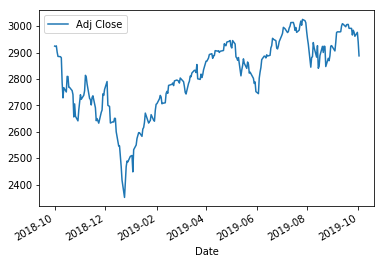

In [26]:
datos_SP500.plot(x = 'Date', y ='Adj Close')

Los rendimientos podrían prensentar valores *NaN*, por lo que nos quedaremos
sólo con los registros que sean finitos:

In [32]:
datos_SP500_finitos = datos_SP500[np.isfinite(datos_SP500['Rend_Diario'])]
datos_SP500_finitos.head()

,index,Date,High,Low,Open,Close,Volume,Adj Close,Rend_Diario,dates
1,1,2018-10-02,2931.419922,2919.370117,2923.800049,2923.429932,3401880000,2923.429932,-0.000397,2018-10-02
2,2,2018-10-03,2939.860107,2921.360107,2931.689941,2925.510010,3598710000,2925.510010,0.000711,2018-10-03
3,3,2018-10-04,2919.780029,2883.919922,2919.350098,2901.610107,3496860000,2901.610107,-0.008203,2018-10-04
4,4,2018-10-05,2909.639893,2869.290039,2902.540039,2885.570068,3328980000,2885.570068,-0.005543,2018-10-05
5,5,2018-10-08,2889.449951,2862.080078,2877.530029,2884.429932,3330320000,2884.429932,-0.000395,2018-10-08


En este caso, al sólo considerar un *asset*, nuestro resultadao será:
$$VaR_{1-q}^{SP500} = \mu_{SP500} - (Z_{q} \sigma_{SP500})$$

Así que es necesario definir un monto de inversión y obtener 
la desviación estándar y los cuantiles deseados.

En este caso, consideraremos $1,000,000 USD como la inversión.

Los niveles de confianza deseados son: 95%, 99.5% y 99.9%

In [37]:
inversion = 1000000
confianza1 = .95
confianza2 = .995
confianza3 = .999

### Media y desviación de los rendimientos diarios
muSP500Diario = datos_SP500_finitos['Rend_Diario'].mean()
sigmaSP500Diario = datos_SP500_finitos['Rend_Diario'].std()

### Cuantiles para los niveles de confianza dados
Z1 = norm.ppf(confianza1)
Z2 = norm.ppf(confianza2)
Z3 = norm.ppf(confianza3)

### Cálculo del VaR a distintos niveles de confianza
VaR_SP500_Diario_1 = muSP500Diario - (Z1 * sigmaSP500Diario)
VaR_SP500_Diario_2 = muSP500Diario - (Z2 * sigmaSP500Diario)
VaR_SP500_Diario_3 = muSP500Diario - (Z3 * sigmaSP500Diario)

### VaR expresado en moneda
VaR_SP500_Diario_1_Currency = VaR_SP500_Diario_1 * inversion
VaR_SP500_Diario_2_Currency = VaR_SP500_Diario_2 * inversion
VaR_SP500_Diario_3_Currency = VaR_SP500_Diario_3 * inversion

In [38]:
VaR_SP500_Diario_1_Currency

-17478.964772360741

In [39]:
VaR_SP500_Diario_2_Currency

-27343.356204988537

In [40]:
VaR_SP500_Diario_3_Currency

-32793.845084029599

De modo que tomando un horizonte diario, las pérdidas del S&P 500 para distintos
niveles de confianza son:

a) Confianza al 95%: Pérdida potencial de $17,478.9647

b) Confianza al 99.5%: Pérdida potencial de $27,343.3562

c) Confianza al 99.9%: Pérdida potencial de $32,793.8451

### S&P 500: Horizonte semanal

Basta con re-escalar nuestros parámetros a su forma semanal.

Dado que los Exchanges sólo operan en días hábiles, consideramos 5 días:

$$\mu^{sem} = \mu  5$$

$$\sigma^{sem} = \sigma \sqrt{5}$$

In [43]:
muSP500Semanal = muSP500Diario * 5
sigmaSP500Semanal = sigmaSP500Diario * np.sqrt(5)

Volvemos a calcular el VaR pero con horizonte semanal:

In [44]:
### Cálculo del VaR a distintos niveles de confianza
VaR_SP500_Semanal_1 = muSP500Semanal - (Z1 * sigmaSP500Semanal)
VaR_SP500_Semanal_2 = muSP500Semanal - (Z2 * sigmaSP500Semanal)
VaR_SP500_Semanal_3 = muSP500Semanal - (Z3 * sigmaSP500Semanal)

### VaR expresado en moneda
VaR_SP500_Semanal_1_Currency = VaR_SP500_Semanal_1 * inversion
VaR_SP500_Semanal_2_Currency = VaR_SP500_Semanal_2 * inversion
VaR_SP500_Semanal_3_Currency = VaR_SP500_Semanal_3 * inversion

In [45]:
VaR_SP500_Semanal_1_Currency

-39223.722349062547

In [46]:
VaR_SP500_Semanal_2_Currency

-61281.172149084829

In [47]:
VaR_SP500_Semanal_3_Currency

-73468.835793227307

Nuestros resultados con horizonte semanal son:

a) Confianza 95%: Pérdida potencial de $39,223.7223

b) Confianza 99.5%: Pérdida potncial de $61,281.1721

c) Confianza 99.9%: Pérdida potencial de $73,468.8357

### Horizonte Mensual

Nuestro escalamiento ahora es:

$$\mu^{men} = \mu 30$$

$$\sigma^{men} = \sigma \sqrt{30}$$

In [48]:
muSP500Mensual = muSP500Diario * 30
sigmaSP500Mensual = sigmaSP500Diario * np.sqrt(30)

Volvemos a calcular el VaR pero con horizonte mensual:

In [49]:
### Cálculo del VaR a distintos niveles de confianza
VaR_SP500_Mensual_1 = muSP500Mensual - (Z1 * sigmaSP500Mensual)
VaR_SP500_Mensual_2 = muSP500Mensual - (Z2 * sigmaSP500Mensual)
VaR_SP500_Mensual_3 = muSP500Mensual - (Z3 * sigmaSP500Mensual)

### VaR expresado en moneda
VaR_SP500_Mensual_1_Currency = VaR_SP500_Mensual_1 * inversion
VaR_SP500_Mensual_2_Currency = VaR_SP500_Mensual_2 * inversion
VaR_SP500_Mensual_3_Currency = VaR_SP500_Mensual_3 * inversion

In [50]:
VaR_SP500_Mensual_1_Currency

-96974.547584470871

In [51]:
VaR_SP500_Mensual_2_Currency

-151004.04462158031

In [52]:
VaR_SP500_Mensual_3_Currency

-180857.60170639874

Nuestros resultados con horizonte semanal:

a) Confianza 95%: Pérdida potencial de $96,974.5475

b) Confianza 99.5%: Pérdida potencial de $151,004.0446

c) COnfianza 99.9%: Pédida potencial de $180,857.6017

### Horizonte Anual

Nuestro escalamiento es:

$$\mu^{anual} = \mu 252$$

$$\sigma^{anual} = \sigma \sqrt{252}$$

In [53]:
muSP500Anual = muSP500Diario * 252
sigmaSP500Anual = sigmaSP500Diario * np.sqrt(252)

Volvemos a calcular el VaR pero con horizonte mensual:

In [55]:
### Cálculo del VaR a distintos niveles de confianza
VaR_SP500_Anual_1 = muSP500Anual - (Z1 * sigmaSP500Anual)
VaR_SP500_Anual_2 = muSP500Anual - (Z2 * sigmaSP500Anual)
VaR_SP500_Anual_3 = muSP500Anual - (Z3 * sigmaSP500Anual)

### VaR expresado en moneda
VaR_SP500_Anual_1_Currency = VaR_SP500_Anual_1 * inversion
VaR_SP500_Anual_2_Currency = VaR_SP500_Anual_2 * inversion
VaR_SP500_Anual_3_Currency = VaR_SP500_Anual_3 * inversion

In [56]:
VaR_SP500_Anual_1_Currency

-289393.47882059921

In [57]:
VaR_SP500_Anual_2_Currency

-445985.83821497497

In [58]:
VaR_SP500_Anual_3_Currency

-532509.66680097021

Nuestros resultados con horizonte anual son:

a) Confianza 95%: Pérdida potencial de $289,393.4788

b) COnfianza 99.5%: Pérdida potencial de $445,985.8382

c) Confianza 99.9%: Pérdida potencial de $532,509.6668

### Pregunta 2.
2.	Realizar el mismo ejercicio señalado en el inciso 1, pero considere la distribución empírica 
de las variaciones del índice, compare resultados e interprete.

**Solución**

Es necesario tomar percentiles acorde a los niveles de confianza deseados:

In [67]:
rendimentos_SP500 = np.asarray(datos_SP500_finitos['Rend_Diario'])

VaR_SP500_Empirico_1 = np.percentile(rendimentos_SP500, (confianza1 * 100))
VaR_SP500_Empirico_2 = np.percentile(rendimentos_SP500, (confianza2 * 100))
VaR_SP500_Empirico_3 = np.percentile(rendimentos_SP500, (confianza3 * 100))

VaR_SP500_Empirico_1_Currency = VaR_SP500_Empirico_1 * inversion
VaR_SP500_Empirico_2_Currency = VaR_SP500_Empirico_2 * inversion
VaR_SP500_Empirico_3_Currency = VaR_SP500_Empirico_3 * inversion

In [68]:
VaR_SP500_Empirico_1_Currency

14429.472998304998

In [69]:
VaR_SP500_Empirico_2_Currency

30942.835382252182

In [70]:
VaR_SP500_Empirico_3_Currency

44727.58923958028

Entonces, nuestros resultados son

a) COnfianza 95%: Pérdida potencial (empírica) de $14,429.4729

b) Confianza 99.5%: Pérdida potencial (empírica) de $30,942.8353

c) Confianza 99.9%: Pérdida potencial (empírica) de $44,727.5892

### Pregunta 3

3.	Determine el VAR paramétrico diario y semanal del tipo de cambio para el Yen 
Japonés, con una confianza del 95%, 99.5% y 99.9%

**Solución**

Primero es necesario obtener los datos del tipo de cambio PESO/YEN:
La fuente de la serie histórica esta vez será el Banco de México, liga
a continuación:

Link: http://www.anterior.banxico.org.mx/SieInternet/consultarDirectorioInternetAction.do?sector=6&accion=consultarCuadro&idCuadro=CF307&locale=es

Utilizaremos *Pandas* para leer los datos:

In [7]:
ruta = 'C:/Users/PC/Desktop/ULSA/7 Semestre/Admon de Riesgos/Tipo_Cambio_MXN_JPY.csv'

datos_Yen = pd.read_csv(ruta)

datos_Yen.head()

,Fecha,Yen
0,01/10/2018,0.1636
1,02/10/2018,0.1648
2,03/10/2018,0.1652
3,04/10/2018,0.1674
4,05/10/2018,0.1664


Obtengamos ahora los rendimientos:

In [8]:
closeYen = np.asarray(datos_Yen['Yen'])
rendimientosYen = np.zeros(len(closeYen)-1)

for i in range(len(rendimientosYen)):
    rendimientosYen[i] = np.log(closeYen[i+1] / closeYen[i])

rendimientosYenPd = pd.Series(rendimientosYen)

datos_Yen['Rend_Yen_Diarios'] = rendimientosYenPd

### Recorremos los rendimientos un lugar
datos_Yen['Rend_Yen_Diarios'] = datos_Yen['Rend_Yen_Diarios'].shift(+1)

datos_Yen.head()

,Fecha,Yen,Rend_Yen_Diarios
0,01/10/2018,0.1636,NaN
1,02/10/2018,0.1648,0.007308
2,03/10/2018,0.1652,0.002424
3,04/10/2018,0.1674,0.013229
4,05/10/2018,0.1664,-0.005992


Visualizando el comportamiento del tipo de cambio del Yen:

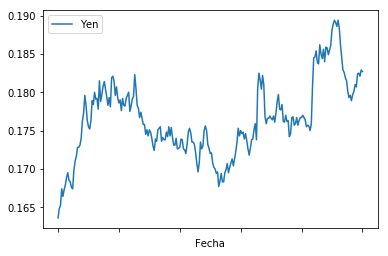

In [9]:
datos_Yen.plot(x='Fecha', y='Yen')

Obtengamos DataFrame con valores finitos para los rendimientos:

In [10]:
datos_Yen_finitos = datos_Yen[np.isfinite(datos_Yen['Rend_Yen_Diarios'])]
datos_Yen_finitos.head()

,Fecha,Yen,Rend_Yen_Diarios
1,02/10/2018,0.1648,0.007308
2,03/10/2018,0.1652,0.002424
3,04/10/2018,0.1674,0.013229
4,05/10/2018,0.1664,-0.005992
5,08/10/2018,0.1673,0.005394


Obtenemos media y desviación estándard:

In [12]:
inversion = 1000000
confianza1 = .95
confianza2 = .995
confianza3 = .999

Z1 = norm.ppf(confianza1)
Z2 = norm.ppf(confianza2)
Z3 = norm.ppf(confianza3)

muYenDiario = datos_Yen_finitos['Rend_Yen_Diarios'].mean()
sigmaYenDiario = datos_Yen_finitos['Rend_Yen_Diarios'].std()

Ya podemos calcular el VaR acorde a nuestros niveles de confianza:

In [13]:
VaR_Yen_Diario_1 = muYenDiario - (Z1 * sigmaYenDiario)
VaR_Yen_Diario_2 = muYenDiario - (Z2 * sigmaYenDiario)
VaR_Yen_Diario_3 = muYenDiario - (Z3 * sigmaYenDiario)

### Expresamos en porcentaje
VaR_Yen_Diario_1_Pct = VaR_Yen_Diario_1 * 100
VaR_Yen_Diario_2_Pct = VaR_Yen_Diario_2 * 100
VaR_Yen_Diario_3_Pct = VaR_Yen_Diario_3 * 100

### Expresamos en términos de pesos
VaR_Yen_Diario_1_Pesos = VaR_Yen_Diario_1 * inversion
VaR_Yen_Diario_2_Pesos = VaR_Yen_Diario_2 * inversion
VaR_Yen_Diario_3_Pesos = VaR_Yen_Diario_3 * inversion

In [14]:
VaR_Yen_Diario_1_Pesos

-11597.156158663838

In [15]:
VaR_Yen_Diario_2_Pesos

-18411.055781432544

In [16]:
VaR_Yen_Diario_3_Pesos

-22176.020338086335

Nuestros resultados con horizonte diario son:

a) Confianza 95%: Pérdida potencial de $11,597.1561

b) Confianza 99.5%: Pérdida potencial de $18,411.0557

c) Confianza 99.9%: Pérdida potencial de $22,176.0203

Eescalamos nuestros parámetros para obtener horizonte semanal

In [17]:
muYenSemanal = 5 * muYenDiario
sigmaYenSemanal = sigmaYenDiario * np.sqrt(5)

Obtenemos VaR de horizonte semanal:

In [18]:
VaR_Yen_Semanal_1 = muYenSemanal - (Z1 * sigmaYenSemanal)
VaR_Yen_Semanal_2 = muYenSemanal - (Z2 * sigmaYenSemanal)
VaR_Yen_Semanal_3 = muYenSemanal - (Z3 * sigmaYenSemanal)

### Expresamos en porcentaje
VaR_Yen_Semanal_1_Pct = VaR_Yen_Semanal_1 * 100
VaR_Yen_Semanal_2_Pct = VaR_Yen_Semanal_2 * 100
VaR_Yen_Semanal_3_Pct = VaR_Yen_Semanal_3 * 100

### Expresamos en pesos
VaR_Yen_Semanal_1_Pesos = VaR_Yen_Semanal_1 * inversion
VaR_Yen_Semanal_2_Pesos = VaR_Yen_Semanal_2 * inversion
VaR_Yen_Semanal_3_Pesos = VaR_Yen_Semanal_3 * inversion

In [ ]:
VaR_Yen_Semanal_1_Pesos

In [ ]:
VaR_Yen_Semanal_2_Pesos

In [ ]:
VaR_Yen_Semanal_3_Pesos

Nuestros resultados para horizonte semanal son:

a) Confianza 95%: Pérdida potencial de $24,711.2445

b) Confianza 99.5%: Pérdida potencial de $39,947.5872

c) Confianza 99.9%: Pérdida potencial de $48,366.3039

### Pregunta 4

4.	Las reservas técnicas de una compañía de seguros se encuentran invertidas en un 
portafolio que consta de tres activos (deberán elegir 4 emisoras que cotizan en la BMV).
En el caso de la acción 1 adquirió 25,536 títulos, para la acción 2 adquirió 17,450 
títulos y para la acción 3 adquirió 11,415 títulos. 

a)	Determinar el valor en riesgo del portafolio (Var Diversificado-Paramétrico) con 
horizonte diario, a un nivel de confianza del 99.5%, considere el dato del 
último precio de cierre de cada acción para hacer la valuación del portafolio. 
 
b)	Para el ejercicio anterior, determine cuáles son los porcentajes de participación
óptimos que se deben invertir en cada acción de manera que el VAR sea el mínimo

**Solución**
Para considerar un portafolio diversificado, tomaremos como compañías a 

a) Peñoles
b) Televisa
c) América Móvil

En ese mismo orden se hará la asignación de títulos.

Tomamos entonces los datos de Yahoo Finance:

In [4]:
datos_Penoles = web.get_data_yahoo('PE&OLES.MX', fechaInicial, fechaFinal)
datos_Televisa = web.get_data_yahoo('TLEVISACPO.MX', fechaInicial, fechaFinal)
datos_Amovil = web.get_data_yahoo('AMXL.MX', fechaInicial, fechaFinal)

Datos de Peñoles

In [5]:
datos_Penoles.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-10-01,325.799988,320.010010,322.000000,322.600006,270430.0,309.368011
2018-10-02,329.790009,322.630005,322.630005,328.649994,248141.0,315.169830
2018-10-03,330.890015,322.000000,327.660004,323.000000,134916.0,309.751587
2018-10-04,327.019989,320.000000,323.799988,322.089996,236310.0,308.878906
2018-10-05,329.799988,320.109985,325.250000,328.399994,314729.0,314.930115


Datos de Televisa

In [6]:
datos_Televisa.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-10-01,67.510002,66.239998,66.440002,67.080002,2038946.0,66.424561
2018-10-02,68.440002,66.970001,67.190002,67.419998,1331518.0,66.761230
2018-10-03,67.680000,66.000000,67.660004,66.330002,1543931.0,65.681885
2018-10-04,66.449997,63.349998,66.449997,64.239998,3167706.0,63.612305
2018-10-05,64.650002,62.799999,64.650002,64.059998,2342492.0,63.434063


Datos de América Móvil

In [7]:
datos_Amovil.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-10-01,15.27,15.06,15.08,15.24,16547257.0,15.045860
2018-10-02,15.31,15.07,15.24,15.16,21345181.0,14.966879
2018-10-03,15.22,14.62,15.19,14.68,53206915.0,14.492994
2018-10-04,14.75,14.30,14.65,14.71,49120786.0,14.522612
2018-10-05,14.78,14.55,14.75,14.59,24800638.0,14.404140
